In [1]:
import pandas as pd

In [5]:
df = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:16.597
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16.389
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42.228
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18.188


In [21]:
new_df = df[df['shop_id']!=42]

In [22]:
new_df=new_df[new_df['shop_id']!=78]

In [25]:
new_df['order_amount'].sum()/5000

294.3328

In [17]:
df['order_amount'].sum()/5000

3145.128

In [48]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [33]:
order_summary = df.groupby('shop_id')['order_amount'].sum().reset_index()
order_summary

,shop_id,order_amount
0,1,13588
1,2,9588
2,3,14652
3,4,13184
4,5,13064
...,...,...
95,96,16830
96,97,15552
97,98,14231
98,99,18330


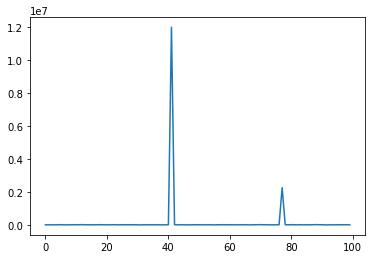

In [34]:
import matplotlib.pyplot as plt
plt.plot(order_summary['order_amount'])

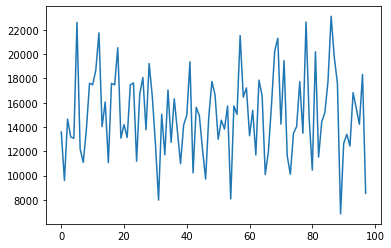

In [36]:
order_summary = new_df.groupby('shop_id')['order_amount'].sum().reset_index()
order_summary
plt.plot(order_summary['order_amount'])

In [45]:
#shop_id_42
df[df['shop_id']==42].head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
40,41,42,793,352,1,credit_card,2017-03-24 14:15:40.649
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000
308,309,42,770,352,1,credit_card,2017-03-11 18:14:38.774
409,410,42,904,704,2,credit_card,2017-03-04 14:32:57.621
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00.000
834,835,42,792,352,1,cash,2017-03-25 21:31:24.596
835,836,42,819,704,2,cash,2017-03-09 14:15:15.136
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45.330
979,980,42,744,352,1,debit,2017-03-12 13:09:03.570


In [44]:
df[df['shop_id']==78].head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834
490,491,78,936,51450,2,debit,2017-03-26 17:08:18.911
493,494,78,983,51450,2,cash,2017-03-16 21:39:35.400
511,512,78,967,51450,2,cash,2017-03-09 07:23:13.640
617,618,78,760,51450,2,cash,2017-03-18 11:18:41.848
691,692,78,878,154350,6,debit,2017-03-27 22:51:43.203
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:44.830
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:25.551
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21.438
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:19.843


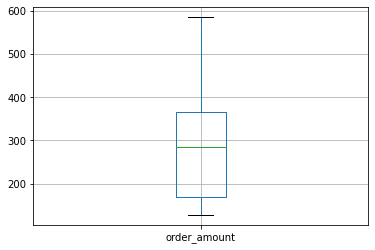

In [60]:
q1 = new_df.order_amount.quantile(q=0.05)
q3 = new_df.order_amount.quantile(q=0.95)

new_AOV = new_df[(new_df.order_amount < q3) & (new_df.order_amount > q1)]
new_AOV.boxplot(column='order_amount')

In [61]:
new_AOV.order_amount.describe()

count    4387.000000
mean      288.857762
std       123.832486
min       127.000000
25%       169.000000
50%       284.000000
75%       366.000000
max       585.000000
Name: order_amount, dtype: float64